In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#### Read CSV containing player stats

In [2]:
TOI_df = pd.read_csv('Final-DataFrames/NHLTotTime.csv')
TOI_df.head()

,Unnamed: 0,PLAYER,TEAM,GP,G,A,PTS,+/-,TOI/G,SHFT,SHFT/G,PROD,POS,hr,min,sec,TIMES
0,0,Suter Ryan,MIN,82.0,7,40,47,-8,26:42:00,2222,27.1,46:34:00,D,26.0,42.0,0.0,2132.0
1,1,Doughty Drew,LA,82.0,8,37,45,-34,26:36:00,2393,29.2,48:27:00,D,26.0,36.0,0.0,2132.0
2,2,Letang Kris,PIT,65.0,16,40,56,13,25:58:00,1923,29.6,30:07:00,D,25.0,58.0,0.0,1625.0
3,3,Jones Seth,CBJ,75.0,9,37,46,1,25:49:00,2214,29.5,42:06:00,D,25.0,49.0,0.0,1875.0
4,4,Josi Roman,NSH,82.0,15,41,56,9,25:10:00,2359,28.8,36:51:00,D,25.0,10.0,0.0,2050.0


#### Convert "Time On Ice per Game" column to numeric

In [3]:
# Create a list of the times in the "TOI/G" column
timelist = list(TOI_df['TOI/G'])

for i in range(len(TOI_df['TOI/G'])):
    timesplit = timelist[i].split(':')
    
    
    whole = int(timesplit[0])
    decimal = int(timesplit[1])/60
    
    minutes = whole + decimal
    
    TOI_df['TOI/G'][i] = minutes
    
TOI_df.head(2)

,Unnamed: 0,PLAYER,TEAM,GP,G,A,PTS,+/-,TOI/G,SHFT,SHFT/G,PROD,POS,hr,min,sec,TIMES
0,0,Suter Ryan,MIN,82.0,7,40,47,-8,26.7,2222,27.1,46:34:00,D,26.0,42.0,0.0,2132.0
1,1,Doughty Drew,LA,82.0,8,37,45,-34,26.6,2393,29.2,48:27:00,D,26.0,36.0,0.0,2132.0


#### Create new DataFrame with important columns

In [4]:
NHL_stats = TOI_df[['PLAYER', 'GP', 'TOI/G']]

# Preparing Data

#### Read our CSV containing Bio data

In [5]:
pd.read_csv('Final-DataFrames/NHLModel.csv').head(4)

,Unnamed: 0,POSITION,HEIGHT,WEIGHT,PLAYER,AGE,Injury Status
0,0,LW,74.0,214,Abdelkader Justin,32,Injured
1,1,LW,71.0,196,Aberg Pontus,25,Injured
2,2,RW,69.0,171,Abramov Vitaly,21,Not Injured
3,3,C,70.0,205,Acciari Noel,27,Not Injured


In [74]:
NHL_1 = pd.read_csv('Final-DataFrames/NHLModel.csv')


# Select columns of interest
NHL_select = NHL_1[['POSITION', 'HEIGHT', 'WEIGHT', 'PLAYER', 'AGE', 'Injury Status']]

#Merge Playerr Bio data with the player stat data 
NHL = NHL_select.merge(NHL_stats, how='right', on='PLAYER')

#Drop NA rows
NHL = NHL.dropna()

#### Create BMI column

In [7]:
NHL['BMI'] = (NHL['WEIGHT'] / (NHL['HEIGHT'] ** 2)) * 703
NHL.head()

,POSITION,HEIGHT,WEIGHT,PLAYER,AGE,Injury Status,GP,TOI/G,BMI
0,LW,74.0,214.0,Abdelkader Justin,32.0,Injured,71.0,15.4,27.472973
1,LW,71.0,196.0,Aberg Pontus,25.0,Injured,59.0,14.6,27.333466
2,RW,69.0,171.0,Abramov Vitaly,21.0,Not Injured,1.0,13.8667,25.249527
3,C,70.0,205.0,Acciari Noel,27.0,Not Injured,72.0,12.9833,29.411224
4,LW,72.0,199.0,Agostino Kenny,27.0,Not Injured,63.0,12.9167,26.986304


#### Hot Encode The NHL dataframe

In [8]:
# 1 = injured
# 0 = not injured
Encoded_df = pd.get_dummies(NHL, columns=['Injury Status'])[['POSITION', 'HEIGHT', 'WEIGHT', 'PLAYER', 'AGE', 'GP', 'TOI/G','BMI', 'Injury Status_Injured']]
Encoded_df.head()

,POSITION,HEIGHT,WEIGHT,PLAYER,AGE,GP,TOI/G,BMI,Injury Status_Injured
0,LW,74.0,214.0,Abdelkader Justin,32.0,71.0,15.4,27.472973,1
1,LW,71.0,196.0,Aberg Pontus,25.0,59.0,14.6,27.333466,1
2,RW,69.0,171.0,Abramov Vitaly,21.0,1.0,13.8667,25.249527,0
3,C,70.0,205.0,Acciari Noel,27.0,72.0,12.9833,29.411224,0
4,LW,72.0,199.0,Agostino Kenny,27.0,63.0,12.9167,26.986304,0


#### Set y values equal to our Injury Status_Injured column values

In [9]:
import numpy as np
y = np.array(Encoded_df['Injury Status_Injured'])

# Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

# X = pd.get_dummies(Encoded_df[['POSITION', 'HEIGHT', 'WEIGHT', 'AGE', 'GP', 'TOI/G','BMI']], columns=['POSITION'])
X = Encoded_df[['HEIGHT', 'WEIGHT', 'AGE', 'GP', 'TOI/G','BMI']]

New_X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(New_X, y, train_size=0.75)


# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Fit Data

In [50]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Example Prediction:

In [51]:
classifier.predict([X_test[12]])

array([1], dtype=uint8)

#### All Predictions:

In [52]:
classifier.predict(X_test)

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

#### Scores:

In [53]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6118721461187214
Testing Data Score: 0.5570776255707762


# K Nearest Neighbor

#### Create a StandardScater model and fit it to the training data

In [54]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))
# X_scaler = StandardScaler().fit_transform(X_train)

##### Transform the training and testing data using the X_scaler and y_scaler models

In [55]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.699
k: 3, Train/Test Score: 0.845/0.735
k: 5, Train/Test Score: 0.834/0.712
k: 7, Train/Test Score: 0.826/0.717
k: 9, Train/Test Score: 0.819/0.721
k: 11, Train/Test Score: 0.805/0.726
k: 13, Train/Test Score: 0.791/0.735
k: 15, Train/Test Score: 0.787/0.731
k: 17, Train/Test Score: 0.788/0.744
k: 19, Train/Test Score: 0.790/0.735
k: 21, Train/Test Score: 0.785/0.744
k: 23, Train/Test Score: 0.788/0.740
k: 25, Train/Test Score: 0.785/0.731
k: 27, Train/Test Score: 0.779/0.726
k: 29, Train/Test Score: 0.779/0.735
k: 31, Train/Test Score: 0.773/0.731
k: 33, Train/Test Score: 0.769/0.731
k: 35, Train/Test Score: 0.764/0.735
k: 37, Train/Test Score: 0.761/0.740
k: 39, Train/Test Score: 0.766/0.744
k: 41, Train/Test Score: 0.767/0.731
k: 43, Train/Test Score: 0.769/0.731
k: 45, Train/Test Score: 0.767/0.721
k: 47, Train/Test Score: 0.773/0.721
k: 49, Train/Test Score: 0.772/0.721


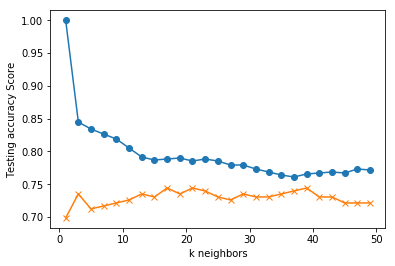

In [62]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [63]:
import math

# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []

k = int( math.sqrt(len(X_train)))

knn = KNeighborsClassifier(n_neighbors=41)
knn.fit(X_train_scaled, y_train)
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)
train_scores.append(train_score)
test_scores.append(test_score)
print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 25, Train/Test Score: 0.767/0.731


Predictions Based On X_Test values

In [64]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
      dtype=uint8)

#### Confusion Maxtrix

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[92, 18],
       [46, 63]], dtype=int64)

#### F1 Score

In [66]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6631578947368421

#### Accuracy Score

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7077625570776256

# Random Forest

In [68]:
import time
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier

#### Make random forest object

In [69]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Train the model

In [70]:
clf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Predict injury or no injury using clf model

In [71]:
#Here we run on the test set
preds=clf.predict(X_test)
print(len(preds))

219


#### Print summary information from running prediction on X_test set

In [72]:
newdf = pd.DataFrame(X_test)
newdf['predicted']=preds
#print(newdf['predicted'].value_counts)
#newdf.index
#newdf.head()
odf=Encoded_df.loc[newdf.index]
odf['predicted']=preds
print("Predicted as injured:")
print(newdf.loc[newdf.predicted==1].shape)
print("Predicted as not injured")
print(newdf.loc[newdf.predicted==0].shape)

Predicted as injured:
(86, 7)
Predicted as not injured
(133, 7)


In [73]:
print(f"Training Data Score: {clf.score(X_train, y_train)}")
print(f"Testing Data Score: {clf.score(X_test, y_test)}")

Training Data Score: 0.9771689497716894
Testing Data Score: 0.7397260273972602


In [ ]:
# Assess quality of preditor
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(odf['Injury Status_Injured'], odf['predicted']) 
print("MSE: %.4f"%mse)